In [3]:
import numpy as np
import pandas as pd

distinct_features = ["By Owner",
                     "Exclusive",
                     "Sublet / Lease-Break",
                     "No Fee",
                     "Reduced Fee",
                     "Short Term Allowed",
                     "Furnished",
                     "Laundry In Unit",
                     "Private Outdoor Space",
                     "Parking Space",
                     "Cats Allowed",
                     "Dogs Allowed",
                     "Doorman",
                     "Elevator",
                     "Fitness Center",
                     "Laundry In Building",
                     "Common Outdoor Space",
                     "Storage Facility"]

def load_data(filename):
    with open(filename) as f:
        data = pd.read_json(f)

    dist = data.features.apply(
        lambda x: pd.Series(map(lambda z: 1 if (z in x) else 0, distinct_features) +
                            [list(np.setdiff1d(x, distinct_features))]))
    dist.columns = distinct_features + ["UNIQUES"]

    data = data.join(dist)

    man_counts = pd.DataFrame(data.manager_id.value_counts())
    man_counts["manager count"] = man_counts["manager_id"]
    man_counts["manager_id"] = man_counts.index

    data = pd.merge(data, man_counts, on="manager_id")

    return data


train_data = pd.read_json("~/two-sigma/data/processed_train.json")

In [4]:
train_data.columns

Index([u'By Owner', u'Cats Allowed', u'Common Outdoor Space', u'Dogs Allowed',
       u'Doorman', u'Elevator', u'Exclusive', u'Fitness Center', u'Furnished',
       u'Laundry In Building', u'Laundry In Unit', u'No Fee', u'Parking Space',
       u'Private Outdoor Space', u'Reduced Fee', u'Short Term Allowed',
       u'Storage Facility', u'Sublet / Lease-Break', u'avg_brightness',
       u'avg_imagesize', u'avg_luminance', u'bathrooms', u'bedrooms',
       u'building_id', u'created', u'description', u'description_sentiment',
       u'display_address', u'dist_count', u'features', u'img_quantity',
       u'interest_level', u'latitude', u'listing_id', u'longitude',
       u'manager count', u'manager_id', u'photos', u'price', u'street_address',
       u'unique_count', u'word_count'],
      dtype='object')

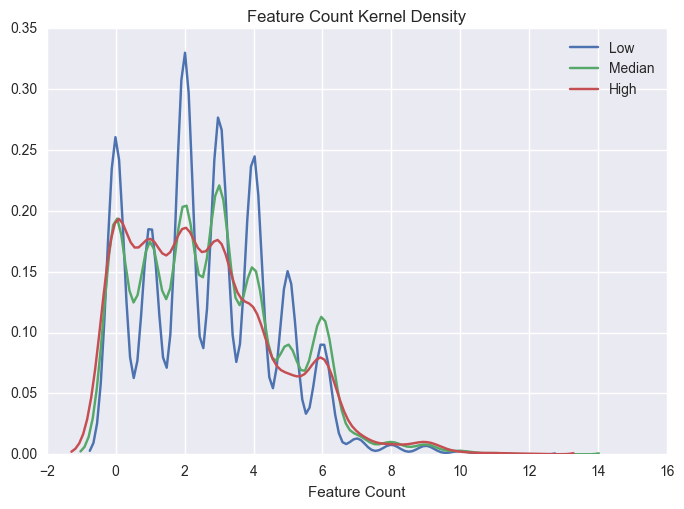

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

Low = train_data[train_data['interest_level']=='low'].dist_count
Med = train_data[train_data['interest_level']=='medium'].dist_count
High = train_data[train_data['interest_level']=='high'].dist_count


sns.kdeplot(Low,label="Low")
sns.kdeplot(Med,label="Median")
sns.kdeplot(High,label="High")
plt.title('Feature Count Kernel Density')
plt.xlabel('Feature Count')
plt.show()


In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

Low_img = train_data[train_data['interest_level']=='low'].img_quantity
Med_img = train_data[train_data['interest_level']=='medium'].img_quantity
High_img = train_data[train_data['interest_level']=='high'].img_quantity



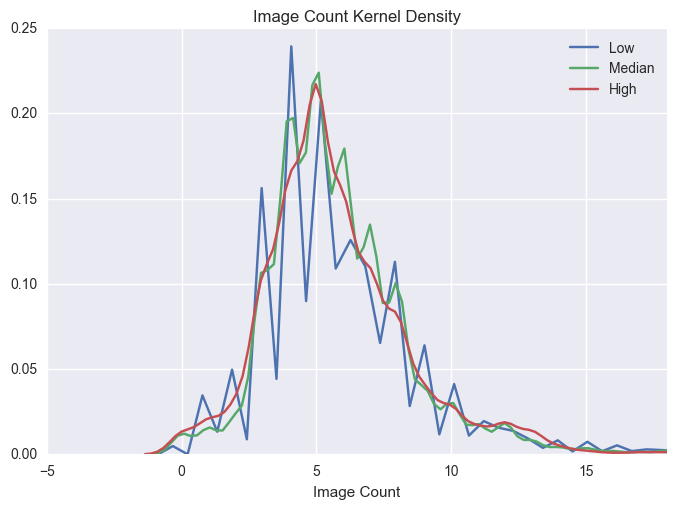

In [7]:
sns.kdeplot(Low_img,label="Low")
sns.kdeplot(Med_img,label="Median")
sns.kdeplot(High_img,label="High")

plt.title('Image Count Kernel Density')
plt.xlabel('Image Count')
plt.xlim(-5,18)
plt.show()

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns


train_data['LogScaledPrice']= np.log(train_data['price'])

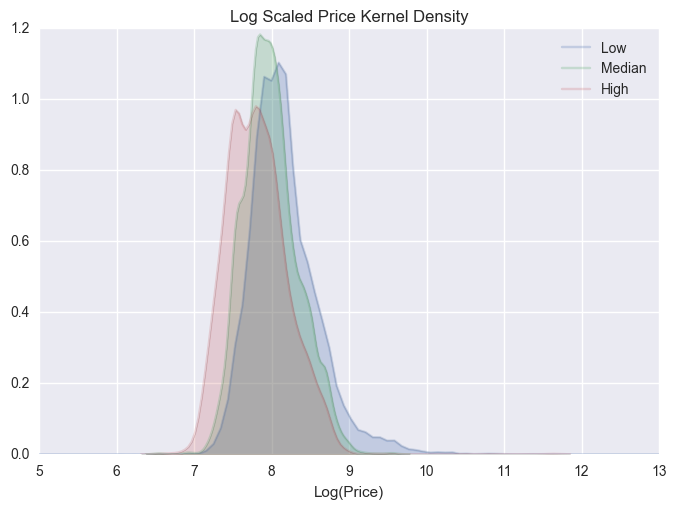

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

Low_price = train_data[train_data['interest_level']=='low'].LogScaledPrice
Med_price = train_data[train_data['interest_level']=='medium'].LogScaledPrice
High_price = train_data[train_data['interest_level']=='high'].LogScaledPrice

sns.kdeplot(Low_price,label="Low",shade = True, alpha = .25 )
sns.kdeplot(Med_price,label="Median",shade = True, alpha = .25)
sns.kdeplot(High_price,label="High",shade = True,alpha = .2)


plt.title('Log Scaled Price Kernel Density')
plt.xlabel('Log(Price)')
plt.xlim(5,13)
#plt.ylim(-5,.000005)
plt.show()

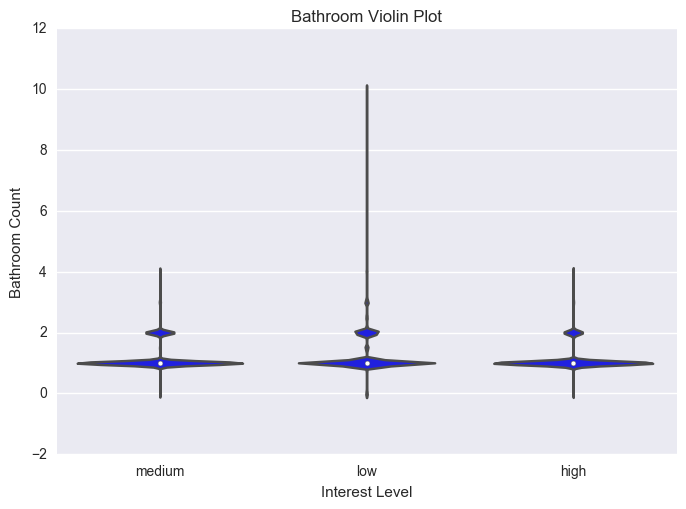

In [10]:

sns.violinplot(train_data["interest_level"], train_data["bathrooms"], color="b")
sns.despine(left=True)
plt.xlabel('Interest Level')
plt.ylabel('Bathroom Count')
plt.title('Bathroom Violin Plot')
plt.show()

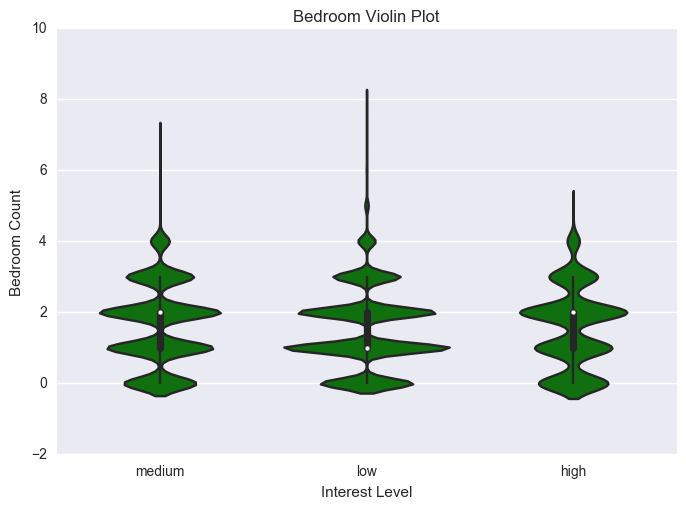

In [11]:
sns.violinplot(train_data["interest_level"], train_data["bedrooms"], color="g")
sns.despine(left=True)
plt.xlabel('Interest Level')
plt.ylabel('Bedroom Count')
plt.title('Bedroom Violin Plot')
plt.show()

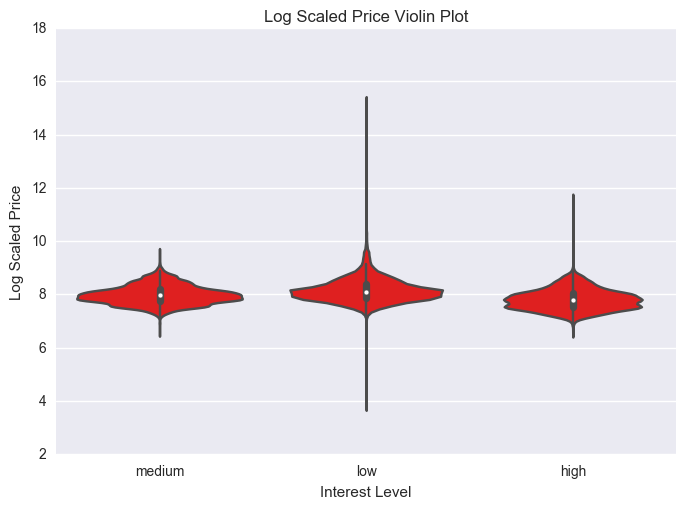

In [12]:
sns.violinplot(train_data["interest_level"], train_data["LogScaledPrice"], color="r")
sns.despine(left=True)
plt.xlabel('Interest Level')
plt.ylabel('Log Scaled Price')
plt.title('Log Scaled Price Violin Plot')
plt.show()

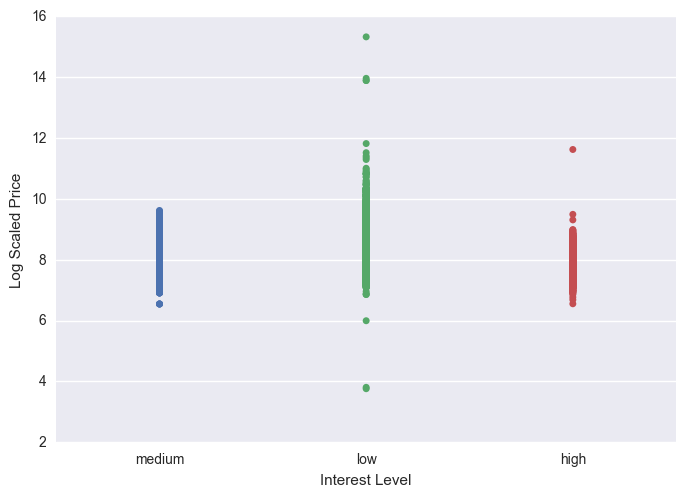

In [13]:
sns.stripplot(x=train_data["interest_level"], y=train_data["LogScaledPrice"], data=train_data)
plt.xlabel('Interest Level')
plt.ylabel('Log Scaled Price')
plt.show()

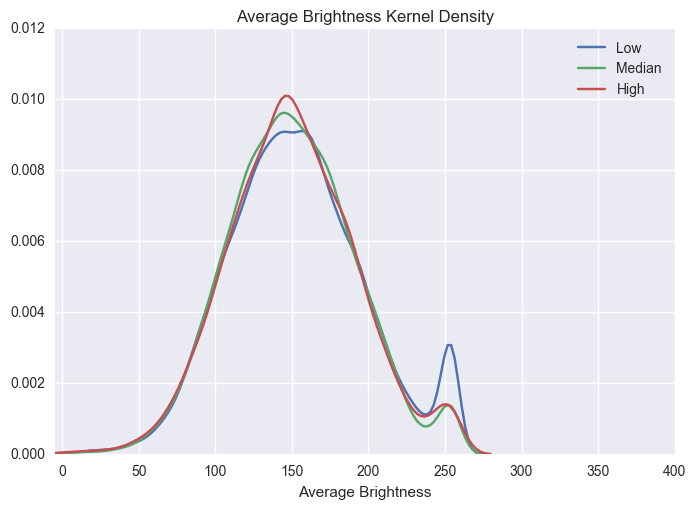

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

Low_avg_brightness = train_data[train_data['interest_level']=='low'].avg_brightness
Med_avg_brightness = train_data[train_data['interest_level']=='medium'].avg_brightness
High_avg_brightness = train_data[train_data['interest_level']=='high'].avg_brightness

sns.kdeplot(Low_avg_brightness,label="Low")
sns.kdeplot(Med_avg_brightness,label="Median")
sns.kdeplot(High_avg_brightness,label="High")



plt.title('Average Brightness Kernel Density')
plt.xlabel('Average Brightness')
plt.xlim(-5,400)
plt.show()

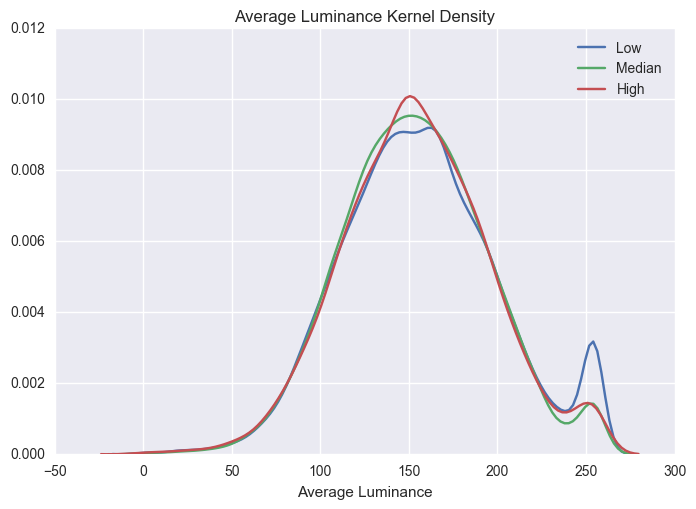

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

Low_avg_luminance = train_data[train_data['interest_level']=='low'].avg_luminance
Med_avg_luminance = train_data[train_data['interest_level']=='medium'].avg_luminance
High_avg_luminance = train_data[train_data['interest_level']=='high'].avg_luminance

sns.kdeplot(Low_avg_luminance,label="Low")
sns.kdeplot(Med_avg_luminance,label="Median")
sns.kdeplot(High_avg_luminance,label="High")

plt.title('Average Luminance Kernel Density')
plt.xlabel('Average Luminance')
#plt.xlim(-5,400)
plt.show()

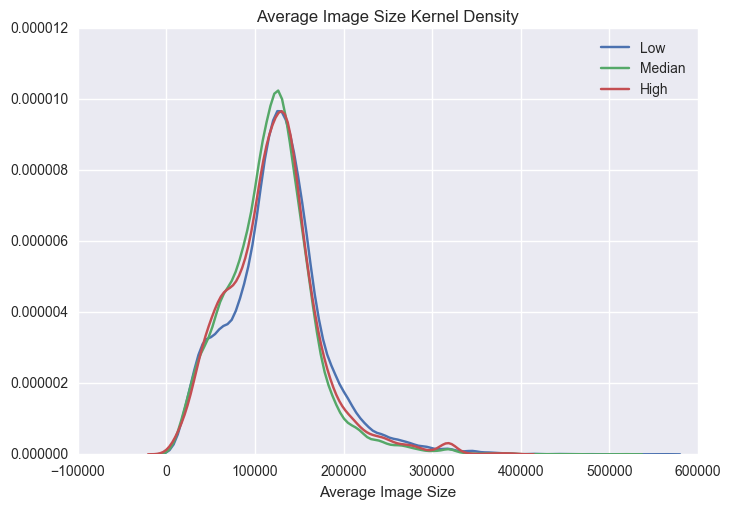

In [16]:
import matplotlib.pyplot as plt
import seaborn as sns

Low_avg_imagesize = train_data[train_data['interest_level']=='low'].avg_imagesize
Med_avg_imagesize = train_data[train_data['interest_level']=='medium'].avg_imagesize
High_avg_imagesize = train_data[train_data['interest_level']=='high'].avg_imagesize

sns.kdeplot(Low_avg_imagesize,label="Low")
sns.kdeplot(Med_avg_imagesize,label="Median")
sns.kdeplot(High_avg_imagesize,label="High")

plt.title('Average Image Size Kernel Density')
plt.xlabel('Average Image Size')
#plt.xlim(-5,400)
plt.show()

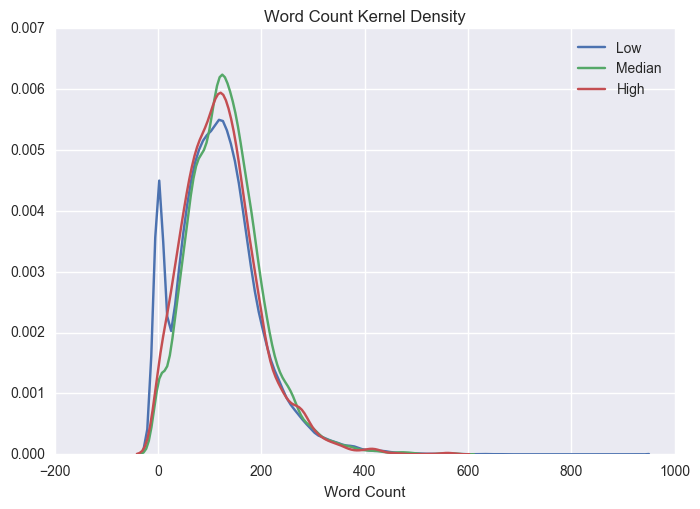

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

Low_word_count = train_data[train_data['interest_level']=='low'].word_count
Med_word_count = train_data[train_data['interest_level']=='medium'].word_count
High_word_count = train_data[train_data['interest_level']=='high'].word_count

sns.kdeplot(Low_word_count,label="Low")
sns.kdeplot(Med_word_count,label="Median")
sns.kdeplot(High_word_count,label="High")

plt.title('Word Count Kernel Density')
plt.xlabel('Word Count')
#plt.xlim(-5,400)
plt.show()